Menginstal & mengimpor library Pandas

In [19]:
from IPython.display import Image, display

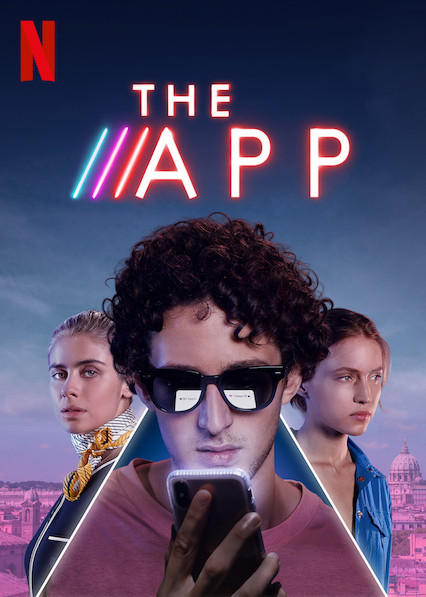

In [20]:
# Path gambar poster dari film pertama
poster_path = 'poster/poster2.jpg'

# Menampilkan gambar poster dari film pertama
display(Image(filename=poster_path))

In [21]:
import pandas as pd

Membaca file .csv

In [22]:
movies = pd.read_csv("NetflixOriginals.csv", encoding="latin1")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11564\2799808389.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB Score', y='Title', data=top_movies, palette=netflix_palette)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11564\2799808389.py:33: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x='IMDB Score', y='Title', data=top_movies, palette=netflix_palette)


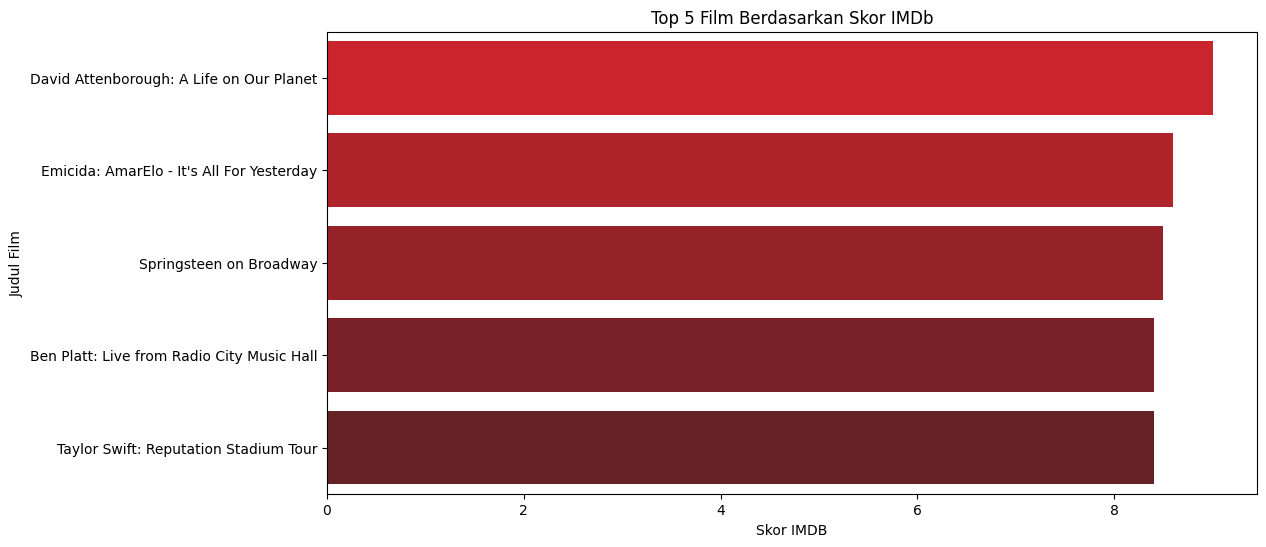

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
    # 3. Distribusi Skor IMDb
#    plt.figure(figsize=(12, 6))
#    sns.histplot(movies['IMDB Score'], bins=10, kde=True, color='blue')
#    plt.title('Distribusi Skor IMDb')
#    plt.xlabel('Skor IMDb')
#   plt.ylabel('Jumlah Film')
#    plt.show()

# 7. Bahasa Film
#plt.figure(figsize=(12, 6))
#sns.countplot(y=movies['Language'], order=movies['Language'].value_counts().index, palette='viridis')
#plt.title('Distribusi Bahasa Film')
#plt.xlabel('Jumlah Film')
#plt.ylabel('Bahasa')
#plt.show()
# Palet kustom yang sesuai dengan tema warna Netflix
netflix_colors = ["#E50914", "#7D141A", "#39201F", "#221f1f"]  # Gradasi merah ke hitam
netflix_cmap = LinearSegmentedColormap.from_list("netflix", netflix_colors, N=256)

# Fungsi untuk mengonversi cmap menjadi daftar warna
def cmap_to_palette(cmap, n_colors):
    return [cmap(i / n_colors) for i in range(n_colors)]

# Menggunakan 10 warna dari palet kustom
netflix_palette = cmap_to_palette(netflix_cmap, 10)

# 9. Top Films Berdasarkan Skor IMDb
top_movies = movies.nlargest(5, 'IMDB Score')
plt.figure(figsize=(12, 6))
sns.barplot(x='IMDB Score', y='Title', data=top_movies, palette=netflix_palette)
plt.title('Top 5 Film Berdasarkan Skor IMDb')
plt.xlabel('Skor IMDB')
plt.ylabel('Judul Film')
plt.show()

Menampilkan beberapa baris pertama dataset

In [24]:
movies = pd.read_csv("NetflixOriginals.csv", encoding="latin1")

# Menyimpan 3 path gambar poster pertama ke dalam sebuah list
poster_urls = ['path/to/poster_A.jpg', 'path/to/poster_B.jpg', 'poster/poster2.jpg', '4']

# Menugaskan 3 path gambar poster pertama ke 3 film pertama dalam dataset
for i in range(4):
    movies.at[i, 'Poster_URL'] = poster_urls[i]

# Menampilkan hasil
#print(movies)
movies.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Poster_URL
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,path/to/poster_A.jpg
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,path/to/poster_B.jpg
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,poster/poster2.jpg
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,4
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,NaN


Menampilkan informasi dataset (jumlah baris & kolom, tipe data untuk setiap kolom, dan jumlah nilai non-null di setiap kolom)

In [25]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
 6   Poster_URL  4 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 32.1+ KB


Menghitung jumlah nilai null setiap kolom

In [26]:
movies.isnull().sum()

Title           0
Genre           0
Premiere        0
Runtime         0
IMDB Score      0
Language        0
Poster_URL    580
dtype: int64

Mengubah nama kolom "IMDB Score" menjadi "Score"

In [27]:
movies.rename(columns={'IMDB Score' : 'Score'}, inplace=True)

Mengganti semua kata "romantic" pada kolom "Genre" dengan kata "romance"

In [28]:
movies['Genre'] = movies['Genre'].str.replace('romantic', 'romance')

Membuat kolom "Genre + Language" yang merupakan gabungan dari kolom "Genre" dan "Language"

In [29]:
movies['Genre + Language'] = movies['Genre'] + "/" + movies['Language']
movies

,Title,Genre,Premiere,Runtime,Score,Language,Poster_URL,Genre + Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,path/to/poster_A.jpg,Documentary/English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,path/to/poster_B.jpg,Thriller/Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,poster/poster2.jpg,Science fiction/Drama/Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,4,Horror thriller/English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,NaN,Mystery/Hindi
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,NaN,Concert Film/English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,NaN,Documentary/English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,NaN,One-man show/English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,NaN,Documentary/Portuguese


Menginstal library Scikit-learn

In [30]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


Mengimpor beberapa library:
1. "CountVectorizer" untuk mengonversi teks menjadi representasi vektor
2. "cosine_similarity" untuk menghitung nilai kesamaan antar vektor
3. "numpy" & "scipy.sparse" untuk melakukan operasi numerik dan representasi matriks

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import scipy.sparse as sp

Mendefinisikan fungsi "custom_tokenizer" untuk "CountVectorizer", menggantikan tanda "/" dan "-" dengan spasi, lalu membagi teks menjadi token-token terpisah

In [32]:
def custom_tokenizer(text):
    return text.replace("/", "").replace("-", "").split()

Mengonversi teks dalam kolom "Genre + Language" menjadi representasi numerik

In [33]:
genre_language_vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
genre_language_matrix = genre_language_vectorizer.fit_transform(movies['Genre + Language'])

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Mengonversi teks dalam kolom "Genre" menjadi representasi numerik

In [34]:
genre_vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
genre_matrix = genre_vectorizer.fit_transform(movies['Genre'])

Menggabungkan dua matriks representasi numerik dari kolom 'Genre + Language' dan 'Genre' menjadi satu matriks gabungan

In [35]:
combined_matrix = sp.hstack([genre_language_matrix, genre_matrix])

Menghitung matriks kesamaan, di mana setiap entri mewakili skor kesamaan antara dua film

In [36]:
similarity_matrix = cosine_similarity(combined_matrix)
similarity_matrix

array([[1. , 0. , 0. , ..., 0. , 0.5, 0.5],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0.5, 0. , 0. , ..., 0. , 1. , 0.5],
       [0.5, 0. , 0. , ..., 0. , 0.5, 1. ]])

Memilih judul film (yang akan diminta rekomendasinya) untuk mendapatkan indeksnya

In [37]:
film_req = movies[movies['Title']=='The Irishman'].index[0]
film_req

561

Mengurutkan daftar rekomendasi berdasarkan skor kesamaan dan skor IMDB yang didapat dari kolom "Score"

In [38]:
recommendations = sorted(list(enumerate(similarity_matrix[film_req])), reverse=True, key=lambda vector: (vector[1], movies.iloc[vector[0]]['Score']))
recommendations = [(idx, score) for idx, score in recommendations if idx != film_req]
recommendations

[(500, 1.0),
 (429, 1.0),
 (230, 1.0),
 (116, 1.0),
 (508, 0.75),
 (491, 0.75),
 (461, 0.75),
 (361, 0.75),
 (287, 0.75),
 (233, 0.75),
 (565, 0.7071067811865475),
 (562, 0.7071067811865475),
 (549, 0.7071067811865475),
 (488, 0.7071067811865475),
 (454, 0.7071067811865475),
 (470, 0.7071067811865475),
 (475, 0.7071067811865475),
 (477, 0.7071067811865475),
 (438, 0.7071067811865475),
 (418, 0.7071067811865475),
 (389, 0.7071067811865475),
 (406, 0.7071067811865475),
 (409, 0.7071067811865475),
 (411, 0.7071067811865475),
 (369, 0.7071067811865475),
 (374, 0.7071067811865475),
 (376, 0.7071067811865475),
 (381, 0.7071067811865475),
 (322, 0.7071067811865475),
 (336, 0.7071067811865475),
 (299, 0.7071067811865475),
 (317, 0.7071067811865475),
 (269, 0.7071067811865475),
 (291, 0.7071067811865475),
 (247, 0.7071067811865475),
 (258, 0.7071067811865475),
 (222, 0.7071067811865475),
 (224, 0.7071067811865475),
 (211, 0.7071067811865475),
 (191, 0.7071067811865475),
 (198, 0.707106781186547

Menampilkan 10 rekomendasi film terbaik

In [39]:
for i in recommendations[0:10]:
    similarity_score = i[1]
    film_index = i[0]
    if similarity_score > 0:
        print(movies.iloc[film_index].Title)

El Camino: A Breaking Bad Movie
The Highwaymen
Lost Girls
Òlòt?ré
On My Skin
Soni
Ferry
The Crimes That Bind
The Outsider
Rogue City


Menampilkan data lengkap dari semua film yang direkomendasikan

In [40]:
recommendations = sorted(list(enumerate(similarity_matrix[film_req])), reverse=True, key=lambda vector: (vector[1], movies.iloc[vector[0]]['Score']))
recommendation_count = 1  # Penomoran dimulai dari 1
for film_index, similarity_score in recommendations:
    if similarity_score > 0 and film_index != film_req:
        title = movies.iloc[film_index]['Title']
        imdb_score = movies.iloc[film_index]['Score']
        genre = movies.iloc[film_index]['Genre']
        print(f"{recommendation_count}.Title: {title}, Similarity Score: {similarity_score}, Genre: {genre} , IMDb Score: {imdb_score}")
        recommendation_count += 1

1.Title: El Camino: A Breaking Bad Movie, Similarity Score: 1.0, Genre: Crime drama , IMDb Score: 7.3
2.Title: The Highwaymen, Similarity Score: 1.0, Genre: Crime drama , IMDb Score: 6.9
3.Title: Lost Girls, Similarity Score: 1.0, Genre: Crime drama , IMDb Score: 6.1
4.Title: Òlòt?ré, Similarity Score: 1.0, Genre: Crime drama , IMDb Score: 5.5
5.Title: On My Skin, Similarity Score: 0.75, Genre: Crime drama , IMDb Score: 7.3
6.Title: Soni, Similarity Score: 0.75, Genre: Crime drama , IMDb Score: 7.2
7.Title: Ferry, Similarity Score: 0.75, Genre: Crime drama , IMDb Score: 7.1
8.Title: The Crimes That Bind, Similarity Score: 0.75, Genre: Crime drama , IMDb Score: 6.6
9.Title: The Outsider, Similarity Score: 0.75, Genre: Crime drama , IMDb Score: 6.3
10.Title: Rogue City, Similarity Score: 0.75, Genre: Crime drama , IMDb Score: 6.1
11.Title: Marriage Story, Similarity Score: 0.7071067811865475, Genre: Drama , IMDb Score: 7.9
12.Title: The Trial of the Chicago 7, Similarity Score: 0.7071067

Membuat fungsi recommend()

In [41]:
def recommend(movie):
    film_req = movies[movies['Title']==movie].index[0]
    recommendations = sorted(list(enumerate(similarity_matrix[film_req])), reverse=True, key=lambda vector: (vector[1], movies.iloc[vector[0]]['Score']))
    recommendations = [(idx, score) for idx, score in recommendations if idx != film_req]
    for i in recommendations[0:10]:
        similarity_score = i[1]
        film_index = i[0]
        if similarity_score > 0:
            print(movies.iloc[film_index].Title)

Memanggil fungsi recommend()

In [42]:
recommend("The Irishman")

El Camino: A Breaking Bad Movie
The Highwaymen
Lost Girls
Òlòt?ré
On My Skin
Soni
Ferry
The Crimes That Bind
The Outsider
Rogue City


Mengimpor library Pickle untuk mengubah objek Python menjadi format yang dapat disimpan

In [43]:
import pickle

Menyimpan movies dan similarity_matrix ke dalam file .pkl

In [44]:
pickle.dump(movies, open('movies_list.pkl','wb'))

In [45]:
pickle.dump(similarity_matrix, open('similarity.pkl','wb'))

Memuat data yang telah disimpan dalam file .pkl

In [46]:
pickle.load(open('movies_list.pkl','rb'))

,Title,Genre,Premiere,Runtime,Score,Language,Poster_URL,Genre + Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,path/to/poster_A.jpg,Documentary/English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,path/to/poster_B.jpg,Thriller/Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,poster/poster2.jpg,Science fiction/Drama/Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,4,Horror thriller/English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,NaN,Mystery/Hindi
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,NaN,Concert Film/English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,NaN,Documentary/English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,NaN,One-man show/English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,NaN,Documentary/Portuguese


Link Streamlit: https://recommendflix.streamlit.app